In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

###### X_MLP/W11_L2(last lec.)-dip-iitm: [HierarchicalAgglomerativeClustering(HAC) algorithm](https://www.youtube.com/watch?v=GG6yYMO91FQ&list=PLyGVjd4KQp13HB4vo0f_ztrpR8dPrDNKP&index=78)

# HierarchicalAgglomerativeClustering(HAC) algorithm

Clustering is concerned about grouping objects with similiar attributes or characteristics. The objects in  the same cluster are closer to one another than the objects from the other clusters.

Hierarchical clustering starts up by considering each datum as a cluster and then combines closest clusters to form larger clusters. This is bottoms up approach.

There is an alternate approach, which is top-down approach, where the entire data is considered as a one single cluster, which is divided to form smaller clusters in each step.



## Linkage
Linkage is a strategy for aggregating clusters.

The **Single Linkage** criterion merges clusters based on the shortest distance over all possible pairs. 

The **Complete linkage** merges clusters to minimize the maximum distance between the clusters(in other words, the distance of the furthest elements).

The **average linkage** criterion uses average distance over all possible pairs between the groups for merging clusters.

The **Ward's linkage** computes the sum of squared distances within the clusters

## Hierarchical Agglomerative Clustering
Algorithm:
1. Calculate the distance matrix between pairs of clusters.
2. While all the objects are clustered into one.
    2a. Detect the two closest groups (clusters) and merge them.
    

### Dendrogram

Dendograms are a graphical representation of the agglomerative process which show a how aggregation happens at each level. Lets take e.g. of a toy dataset to understand this.

#### Using a toy-dataset to demonstrate the working of HAC

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

[[0.93632918 0.35112344]
 [0.85749293 0.51449576]
 [0.83205029 0.5547002 ]
 [0.16439899 0.98639392]
 [0.24253563 0.9701425 ]]


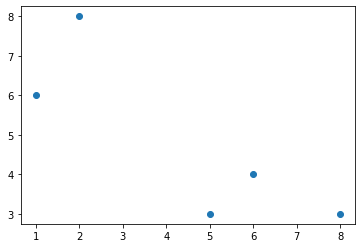

In [15]:
X = np.array([(8, 3), (5,3), (6,4), (1,6), (2,8)])
scaled_X = normalize(X)
print(scaled_X)
plt.scatter(X[:,0], X[:,1]);

Let's plot the dendogram with `scipy.cluster.hierarchy` library.

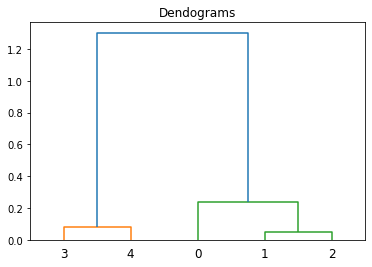

In [13]:
import scipy.cluster.hierarchy as shc
plt.figure()
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_X, method='ward'));

HAC is implemented in `sklearn.cluster` module as AgglomerativeClustering class.